# ENV717 - S2022
A4
Q1. a & b.

In [131]:
##################################################################################################
#       ENV717 - S2022                                                                           #                            
#       This script explores eGRID and 
#       finds the power supply curve from ISO NEW ENGLAND's baseload generators                #
##################################################################################################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### THIS IS NOT THE MOST ELEGANT SOLUTION OF THIS ASSIGNMENT. MANY OF THE LINES OF CODE COULD HAVE BEEN OBVIATED IF WE 
### HAD DEFINED SOME BETTER DATA STRUCTURES TO HANDLE PLANTS BY TYPE AND HAD DEFINED THE FUNCTIONS THAT WILL BE USED 
### MORE THAN ONCE.

##################################################################################################################
## 1. Read eGRID19 file                                                                                          #
##         Read the PLNT19 sheet of the excel file into a pandas DataFrame.                                      #
##         A DataFrame is a two-dimensional labeled data structure with columns of potentially different types   #
##         Specify that the headers are on the second row of the excel file (i.e., row 1 in Python)              #
## 2. Confirm we read all columns by printing the first five rows                                                #
###################################################################################################################
egrid=pd.read_excel("egrid2019_data.xlsx",sheet_name="PLNT19",keep_default_na=False,header=1) #1.
egrid.head(5) #2.

,SEQPLT19,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,1,2019,AK,7-Mile Ridge Wind Project,60814,Alaska Power and Telephone Co,219,Alaska Power and Telephone Co,219,Electric Utility,...,,,,,,,,,,
1,2,2019,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,,,,,,,,,,
2,3,2019,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,,,,,,,,,,
3,4,2019,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
4,5,2019,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [132]:
## 3. Confirm we read all rows by printing the lenght of the DataFrame  (the lenght excludes the header and the row above it)
len(egrid)

11865

In [133]:
## 4. Extract the plants using BACODE
subset=egrid[egrid['BACODE']=="ISNE"]
ISOName="ISO New England"
print("There are",len(subset),"plants in ", ISOName)

There are 1009 plants in  ISO New England


In [134]:
## 5. Q1a. Find the total installed capacity 
subsetCap=subset.NAMEPCAP.sum()
print("The total nameplate capacity of the plants in", ISOName,  "is", "{:.2f}".format(subsetCap),"MW")

The total nameplate capacity of the plants in ISO New England is 46010.30 MW


In [135]:
## 6. Find total generation in 2019 - to calculate percentage generation by fuel later
## But using subset=subset.PLNGENAN.sum() will result in a type error.
## This type error ocurrs because PLNGENAN is an object and not a float
## We can ceck the types of all the columns with dtypes
subset.dtypes

SEQPLT19     int64
YEAR         int64
PSTATABB    object
PNAME       object
ORISPL       int64
             ...  
PLTNPR      object
PLTRPR      object
PLTHPR      object
PLCYPR      object
PLCNPR      object
Length: 140, dtype: object

In [136]:
## We convert PLNGENAN to a number using dataframe.to_numeric
# Note that instead of the line below you could use : subset["PLNGENAN"]=pd.to_numeric(subset["PLNGENAN"])
# but using .loc is preferred
##We can check the type of PLNGENAN is now a float:
#subset["PLNGENAN"].dtype
subset.loc[:,"PLNGENAN"]=pd.to_numeric(subset["PLNGENAN"])
subset["PLNGENAN"].dtype

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


dtype('float64')

In [137]:
## Now we can obtain the total generation using sum
subsetGen=subset.PLNGENAN.sum()
print("The total generation in", ISOName,"in 2019 was",'%.2f' %subsetGen, "MWh")

The total generation in ISO New England in 2019 was 99302794.40 MWh


In [138]:
## To find the capacity and generation by fuel we first need to findout the names of fuel categories PLFUELCT in the DataFrame
subset.PLFUELCT.unique()

array(['SOLAR', 'GAS', 'OIL', 'HYDRO', 'BIOMASS', 'OFSL', 'NUCLEAR', '',
       'WIND', 'OTHF', 'COAL'], dtype=object)

In [139]:
## 6. Q1a. Find the total installed capacity in MW and total electricity generation from power plants of different fuels
## and as a percentage of PJM capacity and generation

## Note this is not the most elegant way to calculate these numbers, but for now it is ok.
biomass=subset[subset['PLFUELCT']=="BIOMASS"]
coal=subset[subset['PLFUELCT']=="COAL"]
gas=subset[subset['PLFUELCT']=="GAS"]
geothermal=subset[subset['PLFUELCT']=="GEOTHERMAL"]
hydro=subset[subset['PLFUELCT']=="HYDRO"]
nuclear=subset[subset['PLFUELCT']=="NUCLEAR"]
oil=subset[subset['PLFUELCT']=="OIL"]
otherff=subset[subset['PLFUELCT']=="OFSL"]
solar=subset[subset['PLFUELCT']=="SOLAR"]
wind=subset[subset['PLFUELCT']=="WIND"]
other=subset[subset['PLFUELCT']=="OTHF"]

bioCap=biomass.NAMEPCAP.sum()
bioGen=biomass.PLNGENAN.sum()
bioCapPer=bioCap/subsetCap*100
bioGenPer=bioGen/subsetGen*100

coalCap=coal.NAMEPCAP.sum()
coalGen=coal.PLNGENAN.sum()
coalCapPer=coalCap/subsetCap*100
coalGenPer=coalGen/subsetGen*100

gasCap=gas.NAMEPCAP.sum()
gasGen=gas.PLNGENAN.sum()
gasCapPer=gasCap/subsetCap*100
gasGenPer=gasGen/subsetGen*100

geoCap=geothermal.NAMEPCAP.sum()
geoGen=geothermal.PLNGENAN.sum()
geoCapPer=geoCap/subsetCap*100
geoGenPer=geoGen/subsetGen*100

hydCap=hydro.NAMEPCAP.sum()
hydGen=hydro.PLNGENAN.sum()
hydCapPer=hydCap/subsetCap*100
hydGenPer=hydGen/subsetGen*100

nucCap=nuclear.NAMEPCAP.sum()
nucGen=nuclear.PLNGENAN.sum()
nucCapPer=nucCap/subsetCap*100
nucGenPer=nucGen/subsetGen*100

oilCap=oil.NAMEPCAP.sum()
oilGen=oil.PLNGENAN.sum()
oilCapPer=oilCap/subsetCap*100
oilGenPer=oilGen/subsetGen*100

ofsCap=otherff.NAMEPCAP.sum()
ofsGen=otherff.PLNGENAN.sum()
ofsCapPer=ofsCap/subsetCap*100
ofsGenPer=ofsGen/subsetGen*100

solCap=solar.NAMEPCAP.sum()
solGen=solar.PLNGENAN.sum()
solCapPer=solCap/subsetCap*100
solGenPer=solGen/subsetGen*100

winCap=wind.NAMEPCAP.sum()
winGen=wind.PLNGENAN.sum()
winCapPer=winCap/subsetCap*100
winGenPer=winGen/subsetGen*100

othCap=other.NAMEPCAP.sum()
othGen=other.PLNGENAN.sum()
othCapPer=othCap/subsetCap*100
othGenPer=othGen/subsetGen*100

print("FUEL                INSTALLED CAPACITY        GENERATION IN 2019")
print("Biomass          ",'%.2f' % bioCap,"MW. ",'%.3f' % bioCapPer,"%. ",'%.2f' % bioGen,"MWh. ",'%.3f' % bioGenPer,"%. \r\n")
print("Coal             ",'%.2f' % coalCap,"MW. ",'%.3f' % coalCapPer,"%. ",'%.2f' % coalGen,"MWh. ",'%.3f' % coalGenPer,"%. \r\n")
print("Gas              ",'%.2f' % gasCap,"MW. ",'%.3f' % gasCapPer,"%. ",'%.2f' % gasGen,"MWh. ",'%.3f' % gasGenPer,"%. \r\n")
print("Geothermal       ",'%.2f' % geoCap,"MW. ",'%.3f' % geoCapPer,"%. ",'%.2f' % geoGen,"MWh. ",'%.3f' % geoGenPer,"%. \r\n")
print("Hydro            ",'%.2f' % hydCap,"MW. ",'%.3f' % hydCapPer,"%. ",'%.2f' % hydGen,"MWh. ",'%.3f' % hydGenPer,"%. \r\n")
print("Nuclear          ",'%.2f' % nucCap,"MW. ",'%.3f' % nucCapPer,"%. ",'%.2f' % nucGen,"MWh. ",'%.3f' % nucGenPer,"%. \r\n")
print("Oil              ",'%.2f' % oilCap,"MW. ",'%.3f' % oilCapPer,"%. ",'%.2f' % oilGen,"MWh. ",'%.3f' % oilGenPer,"%. \r\n")
print("Other Fossil Fuel",'%.2f' % ofsCap,"MW. ",'%.3f' % ofsCapPer,"%. ",'%.2f' % ofsGen,"MWh. ",'%.3f' % ofsGenPer,"%. \r\n")
print("Solar            ",'%.2f' % solCap,"MW. ",'%.3f' % solCapPer,"%. ",'%.2f' % solGen,"MWh. ",'%.3f' % solGenPer,"%. \r\n")
print("Wind             ",'%.2f' % winCap,"MW. ",'%.3f' % winCapPer,"%. ",'%.2f' % winGen,"MWh. ",'%.3f' % winGenPer,"%. \r\n")
print("Other Fuel       ",'%.2f' % othCap,"MW. ",'%.3f' % othCapPer,"%. ",'%.2f' % othGen,"MWh. ",'%.3f' % othGenPer,"%. \r\n")

FUEL                INSTALLED CAPACITY        GENERATION IN 2019
Biomass           1941.90 MW.  4.221 %.  7576022.04 MWh.  7.629 %. 

Coal              632.40 MW.  1.374 %.  301655.00 MWh.  0.304 %. 

Gas               23246.70 MW.  50.525 %.  49047932.54 MWh.  49.392 %. 

Geothermal        0.00 MW.  0.000 %.  0.00 MWh.  0.000 %. 

Hydro             3869.30 MW.  8.410 %.  7160246.99 MWh.  7.211 %. 

Nuclear           4074.90 MW.  8.856 %.  29817525.00 MWh.  30.027 %. 

Oil               6720.20 MW.  14.606 %.  298590.83 MWh.  0.301 %. 

Other Fossil Fuel 31.30 MW.  0.068 %.  0.00 MWh.  0.000 %. 

Solar             1648.80 MW.  3.584 %.  1509999.00 MWh.  1.521 %. 

Wind              2616.80 MW.  5.687 %.  3592687.00 MWh.  3.618 %. 

Other Fuel        203.20 MW.  0.442 %.  -1864.00 MWh.  -0.002 %. 



In [140]:
#7. Q2a. Find the total installed capacity of a subset of PJM plants that meet these requirements:
# Fuel = Coal Gas Nuclear Hydro Oil
# Plant Capacity Factor >= 0.01
# Plant Nameplate capacity >= 1 MW
# before filtering, need to make sure the type of CAPFAC is numeric
subset["CAPFAC"].dtype

dtype('O')

In [141]:
# Change CAPFAC to numeric
subset.loc[:,"CAPFAC"]=pd.to_numeric(subset["CAPFAC"])

In [142]:
# We will filter by one criteria each time to see how many plants are excluded at each time
# but you can combine the criteria using &
subsetSub=subset[(subset.PLFUELCT=="GAS")|(subset.PLFUELCT=="COAL")|(subset.PLFUELCT=="NUCLEAR")|(subset.PLFUELCT=="OIL")|(subset.PLFUELCT=="HYDRO")|(subset.PLFUELCT=="BIOMASS")]
print("The subset contains",len(subsetSub),"plants")

The subset contains 426 plants


In [143]:
subsetSub=subsetSub[subsetSub.NAMEPCAP>1]
print("The subset contains",len(subsetSub),"plants")

The subset contains 418 plants


In [144]:
subsetSub=subsetSub[subsetSub.CAPFAC>0.01]  # This excludes that plants that have blanks as CF (which is ok)
print("The subset contains",len(subsetSub),"plants")

The subset contains 322 plants


In [146]:
subsetSubCap=subsetSub.NAMEPCAP.sum()
print("The total installed capacity of",ISOName,"plants with more than 1% of CF and more than 1 MW of nameplate is",'%.2f' %subsetSubCap,"MW")

The total installed capacity of ISO New England plants with more than 1% of CF and more than 1 MW of nameplate is 30833.80 MW


In [147]:
#8. Q2b. Plot the supply curve assuming all plants are those in the subsetSub
# Before proceeding let's take just the columns that will be used
subsetSub=subsetSub.loc[:,["PNAME","NAMEPCAP","PLFUELCT","PLHTIAN","PLNGENAN","PLCO2EQA"]]
subsetSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA
2412,"Algonquin Power Windsor Locks, LLC",71,GAS,31384.936,124109.56,1955.479
2415,Backus Microgrid Project,10.4,OIL,10056,991.00,824.013
2418,Bradley Energy Center,5.8,GAS,97431.883,15274.00,5700.247
2421,Bridge Street 1 & 2,5.2,OIL,4815,484.00,394.553
2422,Bridgeport Energy,520,GAS,17151757,2462934.00,1020354.717


In [148]:
# check the type of PLHTIAN
subsetSub["PLHTIAN"].dtype

dtype('O')

In [149]:
# convert PLHTIAN to numeric
subsetSub["PLHTIAN"]=pd.to_numeric(subsetSub["PLHTIAN"])
subsetSub["PLHTIAN"].dtype

dtype('float64')

In [150]:
# To build the supply curve we need to find the marginal cost of each plant first
# will assume marginal cost for coal/gas plants is fuel cost only
# Need to calculate fuel cost by multiplying heat-rate and fuel price
# First calculate HEAT RATE -->HEAT RATE (MMBTU/MWH) = ANNUAL HEAT INPUT (MMBTU)/ANNUAL GENERATION (MWH)
# Add heat-rate as a new column to pjmSub
subsetSub["HEATRATE"]=subsetSub["PLHTIAN"] / subsetSub["PLNGENAN"]

In [151]:
# let's check that we added the new column heat rate by looking at the first 5 rows
#The non-thermal plants (e.g., nucclear did not consume BTUs as fuel so the heatrate will be meaningless but that is ok)
subsetSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE
2412,"Algonquin Power Windsor Locks, LLC",71,GAS,3.138494e+04,124109.56,1955.479,0.252881
2415,Backus Microgrid Project,10.4,OIL,1.005600e+04,991.00,824.013,10.147326
2418,Bradley Energy Center,5.8,GAS,9.743188e+04,15274.00,5700.247,6.378937
2421,Bridge Street 1 & 2,5.2,OIL,4.815000e+03,484.00,394.553,9.948347
2422,Bridgeport Energy,520,GAS,1.715176e+07,2462934.00,1020354.717,6.963953


In [152]:
# Now lets create a column of marginal cost in $MWh
# Initialize the new column in zeros
subsetSub["MARGCOST"]=0      
subsetSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST
2412,"Algonquin Power Windsor Locks, LLC",71,GAS,3.138494e+04,124109.56,1955.479,0.252881,0
2415,Backus Microgrid Project,10.4,OIL,1.005600e+04,991.00,824.013,10.147326,0
2418,Bradley Energy Center,5.8,GAS,9.743188e+04,15274.00,5700.247,6.378937,0
2421,Bridge Street 1 & 2,5.2,OIL,4.815000e+03,484.00,394.553,9.948347,0
2422,Bridgeport Energy,520,GAS,1.715176e+07,2462934.00,1020354.717,6.963953,0


In [153]:
coal_price=2.02 # $/MMBTU
gas_price=2.89 # $/MMBTU
nuclear_mc=9 # $/MWh
hydro_mc=6 # $/MWh
oil_price=15 #$MMBTU
biomass_price=11.69 #$/MMBTU
# walk through all the rows of plants and change the MARGCOST depending on fuel

for i in range(0,len(subsetSub)):
    if subsetSub.iloc[i,2]=="COAL":                     # Remember to use == to compare and = to assign
        subsetSub.iloc[i,7]=coal_price*subsetSub.iloc[i,6] # MARGCOST is column 7 because python starts counting from 0
    elif subsetSub.iloc[i,2]=="GAS":                     
         subsetSub.iloc[i,7]=gas_price*subsetSub.iloc[i,6]
    elif subsetSub.iloc[i,2]=="NUCLEAR":                     
         subsetSub.iloc[i,7]=nuclear_mc 
    elif subsetSub.iloc[i,2]=="HYDRO":                     
         subsetSub.iloc[i,7]=hydro_mc 
    elif subsetSub.iloc[i,2]=="BIOMASS":                     
         subsetSub.iloc[i,7]=biomass_price*subsetSub.iloc[i,6]
    else:                   
         subsetSub.iloc[i,7]=oil_price*subsetSub.iloc[i,6] 
subsetSub.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST
2412,"Algonquin Power Windsor Locks, LLC",71,GAS,3.138494e+04,124109.56,1955.479,0.252881,0.730826
2415,Backus Microgrid Project,10.4,OIL,1.005600e+04,991.00,824.013,10.147326,152.209889
2418,Bradley Energy Center,5.8,GAS,9.743188e+04,15274.00,5700.247,6.378937,18.435128
2421,Bridge Street 1 & 2,5.2,OIL,4.815000e+03,484.00,394.553,9.948347,149.225207
2422,Bridgeport Energy,520,GAS,1.715176e+07,2462934.00,1020354.717,6.963953,20.125825


In [154]:
# Now create three new datasets of baseload plants with the new columns
coal2=subsetSub[subsetSub["PLFUELCT"]=="COAL"]
gas2=subsetSub[subsetSub["PLFUELCT"]=="GAS"]
nuclear2=subsetSub[subsetSub["PLFUELCT"]=="NUCLEAR"]
oil2=subsetSub[subsetSub["PLFUELCT"]=="OIL"]
hydro2=subsetSub[subsetSub["PLFUELCT"]=="HYDRO"]
biomass2=subsetSub[subsetSub["PLFUELCT"]=="BIOMASS"]
# now sort all the plants in ASCENDING order by MARGCOST using sort_values
subsetSubSorted=subsetSub.sort_values("MARGCOST")
# now create a column with the cummulative capacity [MW] offered at that MARGCOST or less and initialize in zero
subsetSubSorted["CUMCAP"]=0
subsetSubSorted.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST,CUMCAP
2412,"Algonquin Power Windsor Locks, LLC",71,GAS,31384.936,124109.560,1955.479,0.252881,0.730826,0
5133,Orono Hydro Station,2.7,HYDRO,NaN,9689.000,,NaN,6.000000,0
5134,Otis Hydro,10.2,HYDRO,NaN,55817.000,,NaN,6.000000,0
5137,Pejepscot Hydroelectric Project,13.5,HYDRO,NaN,42702.000,,NaN,6.000000,0
5141,Pittsfield Hydro,1.1,HYDRO,NaN,4228.001,,NaN,6.000000,0


In [160]:
# The first row of the CUMCAP column is just the NAMECAP of that plant (in that row)
subsetSubSorted.iloc[0,8]=subsetSubSorted.iloc[0,1]
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(subsetSubSorted)):  
               subsetSubSorted.iloc[i,8]=subsetSubSorted.iloc[i-1,8]+subsetSubSorted.iloc[i,1]
#Lets find the total installed power capacity. The last value in the CUMCAP column is the maximum demand that can be served
subsetSubSorted.tail(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST,CUMCAP
4603,GRS Fall River,7.3,BIOMASS,351579.000,16361.0,0.001,21.488845,251.204603,30716.1
2449,CT Resource Rec Authority Facility,90,BIOMASS,5464231.250,252925.0,312898.956,21.604156,252.552588,30806.1
5149,Regional Waste Systems,13.3,BIOMASS,1785627.875,79415.0,102246,22.484768,262.846941,30819.4
4755,Pioneer Valley Resource Recovery,9.4,BIOMASS,1044714.000,33448.0,60097.424,31.233975,365.125169,30828.8
5128,MMWAC Resource Recovery Facility,5,BIOMASS,748706.000,16100.0,43038.482,46.503478,543.625661,30833.8


In [162]:

print("The maximum demand that can be served in", ISOName,"with the power plants contained in the PLNT19 tab of eGRID2019, that had a capacity of more than 1 MW and a CF f more than 1% is", subsetSubSorted.iloc[321,8], "MW")

The maximum demand that can be served in ISO New England with the power plants contained in the PLNT19 tab of eGRID2019, that had a capacity of more than 1 MW and a CF f more than 1% is 30833.8 MW


In [163]:
# Now create three new datasets of coal and gas with the new columns MARGCOST and CUMCAP sorted so we can differentiate them
# in the plot
coalSorted=subsetSubSorted[subsetSubSorted["PLFUELCT"]=="COAL"]
gasSorted=subsetSubSorted[subsetSubSorted["PLFUELCT"]=="GAS"]
nuclearSorted=subsetSubSorted[subsetSubSorted["PLFUELCT"]=="NUCLEAR"]
oilSorted=subsetSubSorted[subsetSubSorted["PLFUELCT"]=="OIL"]
hydroSorted=subsetSubSorted[subsetSubSorted["PLFUELCT"]=="HYDRO"]
bioSorted=subsetSubSorted[subsetSubSorted["PLFUELCT"]=="BIOMASS"]

In [164]:
bioSorted.head(5)

,PNAME,NAMEPCAP,PLFUELCT,PLHTIAN,PLNGENAN,PLCO2EQA,HEATRATE,MARGCOST,CUMCAP
4526,Deer Island Treatment,85,BIOMASS,218526.698,43366.55,1617.463,5.039061,58.906625,27244.6
7563,UNH 7.9 MW Plant,7.9,BIOMASS,261545.814,51648.00,3761.652,5.064007,59.198237,27252.5
5164,Somerset Plant,107.1,BIOMASS,2951756.118,531715.00,31454.329,5.551388,64.895722,29184.6
5065,Androscoggin Mill,80,BIOMASS,2152056.213,387253.00,7983.59,5.557236,64.964086,29264.6
11309,Middlebury College,1.6,BIOMASS,19050.523,3395.00,658.936,5.611347,65.596646,29266.2


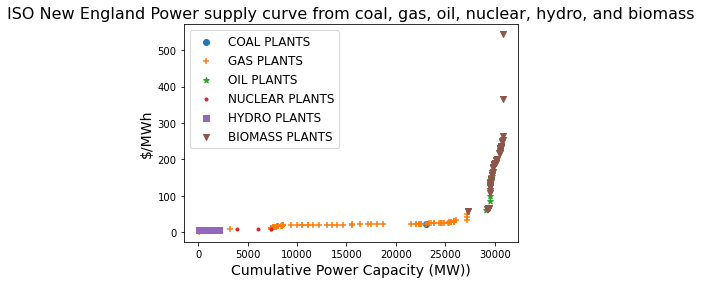

In [165]:
plt.scatter(coalSorted["CUMCAP"],coalSorted["MARGCOST"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CUMCAP"],gasSorted["MARGCOST"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CUMCAP"],oilSorted["MARGCOST"],marker="*",label="OIL PLANTS")
plt.scatter(nuclearSorted["CUMCAP"],nuclearSorted["MARGCOST"],marker=".",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CUMCAP"],hydroSorted["MARGCOST"],marker="s",label="HYDRO PLANTS")
plt.scatter(bioSorted["CUMCAP"],bioSorted["MARGCOST"],marker="v",label="BIOMASS PLANTS")
plt.title(ISOName+" Power supply curve from coal, gas, oil, nuclear, hydro, and biomass",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
plt.show()


In [166]:
title = ISOName+" Power supply curve from coal, gas, oil, nuclear, hydro, and biomass"
print(title)

ISO New England Power supply curve from coal, gas, oil, nuclear, hydro, and biomass


In [168]:
#Let's remove the last two plants in the merit order so we can see the distribution of prices more clearly without these outliers
print("there are a total of", len(subsetSubSorted),"baseload plants with CF > 1% and Capacity > 1MW")

there are a total of 322 baseload plants with CF > 1% and Capacity > 1MW


In [169]:
subsetSubSorted2=subsetSubSorted.iloc[0:len(subsetSubSorted)-2]

In [170]:
len(subsetSubSorted2)

320

In [171]:
coalSorted=subsetSubSorted2[subsetSubSorted2["PLFUELCT"]=="COAL"]
gasSorted=subsetSubSorted2[subsetSubSorted2["PLFUELCT"]=="GAS"]
nuclearSorted=subsetSubSorted2[subsetSubSorted2["PLFUELCT"]=="NUCLEAR"]
oilSorted=subsetSubSorted2[subsetSubSorted2["PLFUELCT"]=="OIL"]
hydroSorted=subsetSubSorted2[subsetSubSorted2["PLFUELCT"]=="HYDRO"]
bioSorted=subsetSubSorted2[subsetSubSorted2["PLFUELCT"]=="BIOMASS"]

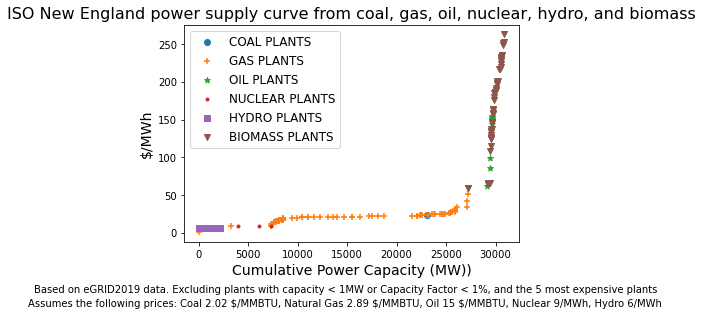

In [172]:
plt.scatter(coalSorted["CUMCAP"],coalSorted["MARGCOST"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CUMCAP"],gasSorted["MARGCOST"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CUMCAP"],oilSorted["MARGCOST"],marker="*",label="OIL PLANTS")
plt.scatter(nuclearSorted["CUMCAP"],nuclearSorted["MARGCOST"],marker=".",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CUMCAP"],hydroSorted["MARGCOST"],marker="s",label="HYDRO PLANTS")
plt.scatter(bioSorted["CUMCAP"],bioSorted["MARGCOST"],marker="v",label="BIOMASS PLANTS")
plt.title(ISOName+" power supply curve from coal, gas, oil, nuclear, hydro, and biomass",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
#Make sure to add a caption that makes this plot a stand-alone piece of information
txt="Based on eGRID2019 data. Excluding plants with capacity < 1MW or Capacity Factor < 1%, and the 5 most expensive plants"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2="Assumes the following prices: Coal 2.02 $/MMBTU, Natural Gas 2.89 $/MMBTU, Oil 15 $/MMBTU, Nuclear 9/MWh, Hydro 6/MWh "
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()